<a href="https://colab.research.google.com/github/leandroleao2k/ImageML/blob/main/KMeans%20Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCAN Exemplo
DBSCAN vai agrupar os padroes de acordo com a densidade de pontos que ele encontrar nos dados ao redor de um (centro)
Ele indentifica CENTROS, OUTLIERS e GRUPOS
Ele equilibra bem mas os valores de parametros epslon, samples precisam ser investigados para melhor agrupamento
Dataset gerados randomicamente com make blobs

Desafios: regioes de alta e baixa densidades (qtd de pontos ao redor de um elemento)


In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

%matplotlib inline
sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (20, 5)})

X , y = make_blobs ( n_samples=1000, centers=7, n_features=2, random_state=33)
df = pd.DataFrame(X, columns=['x','y'])
df['label'] = y
df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


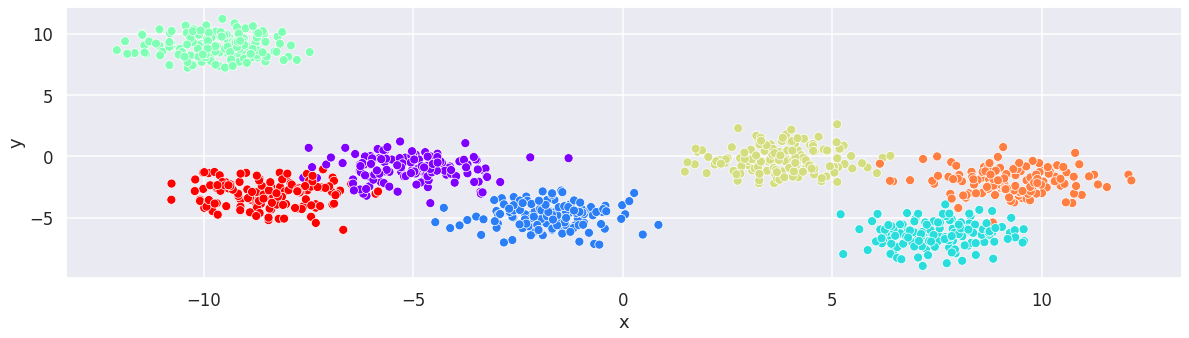

In [ ]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

# Funcao para treinar DBSCAN e plotar

In [ ]:
from sklearn.cluster import DBSCAN
def treinar_plotar_DBSCAN(data, epslon=0.5, min_samples=5):
  data_cp = data.copy()
  data_cp.drop (columns='label',inplace = True)

  model = DBSCAN(eps=epslon, min_samples=min_samples)
  model.fit(data_cp)
  
  data_cp['cluster_labels'] = model.labels_
  _ = sns.scatterplot(x='x', y='y', data=data_cp, hue='cluster_labels', palette='rainbow', legend=False)
  return model.labels_

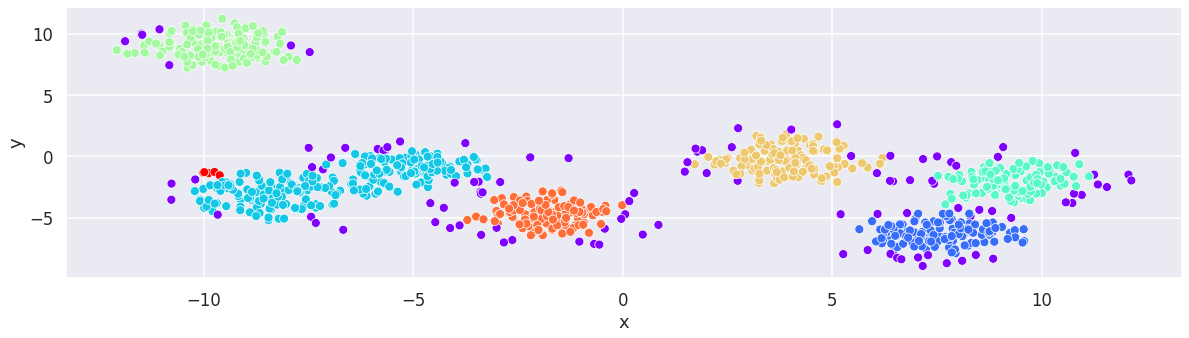

In [ ]:
eps = 0.5
min = 5
labels = treinar_plotar_DBSCAN (df, eps, min)

# exemplo de baixa densidade

          x         y  label
0  0.449533 -0.403077      1
1  1.860595  0.011092      1
2  1.842407 -0.086292      1
3  1.395956 -0.438878      1
4  0.479125  0.926415      0


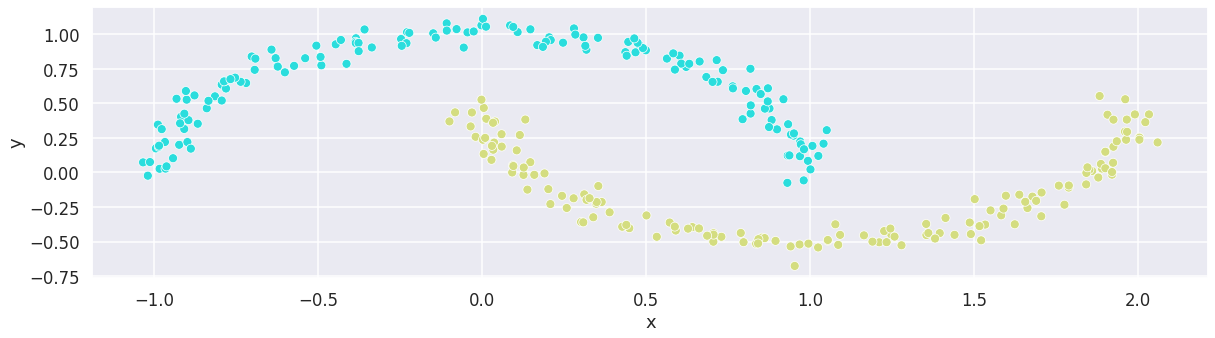

In [ ]:
X, y = make_moons(300, noise= 0.05, random_state=33)

df_baixa_densidade = pd.DataFrame(X, columns=['x','y'])
df_baixa_densidade['label'] = y
print(df_baixa_densidade.head())
_ = sns. scatterplot(x='x',y='y', data=df_baixa_densidade, hue='label', palette = 'rainbow', legend =False )

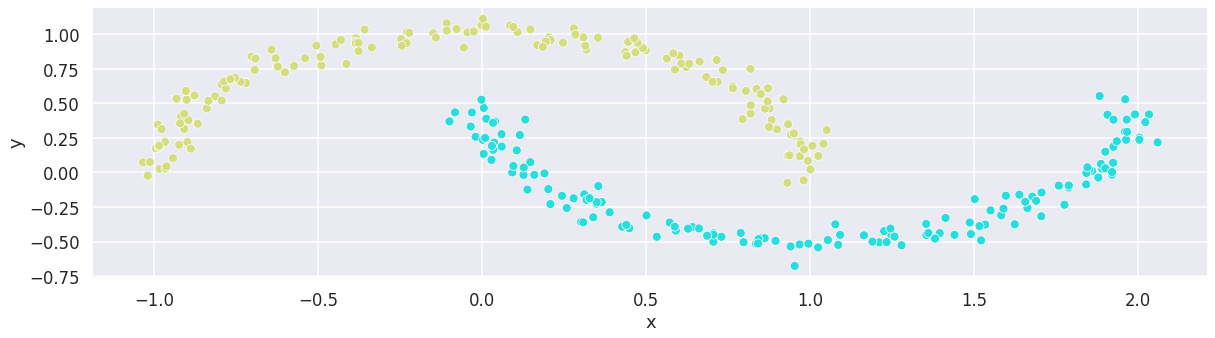

In [ ]:
labels = treinar_plotar_DBSCAN(df_baixa_densidade, 0.3, 5)

## quando se aumenta os samples para 60 ele identifica outros grupos e outliers

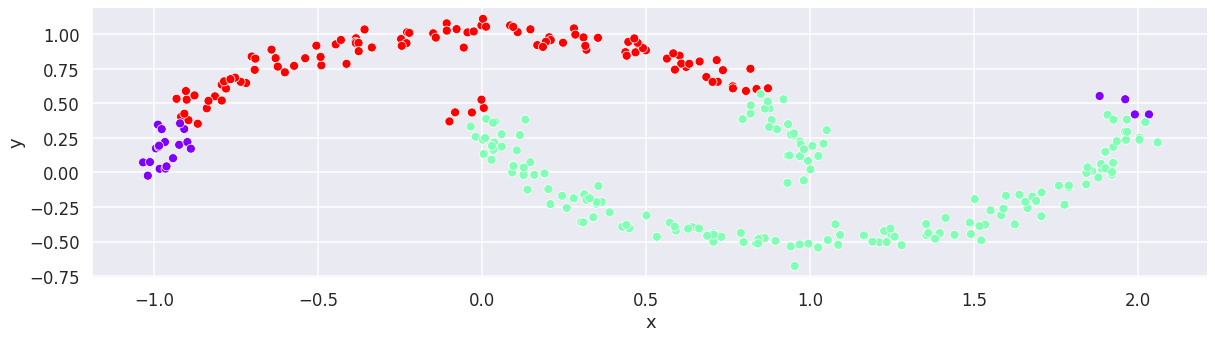

In [ ]:
labels = treinar_plotar_DBSCAN(df_baixa_densidade, 0.6, 60)

# um estudo para melhor achar os parametros é usando o KNN
## chamado de "K-dist plot"

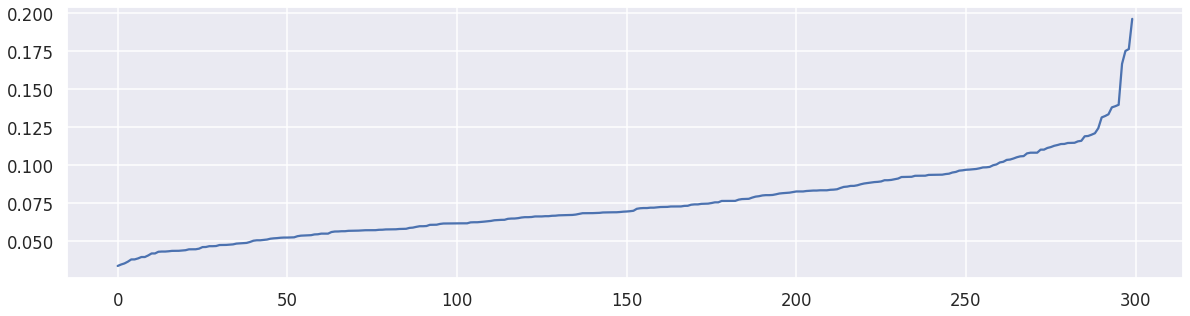

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors

n_vizinhos = 5
knn = NearestNeighbors(n_neighbors=n_vizinhos)
vizinhos = knn.fit(X)
# calcular as distancias dos vizinhos
distancias, indices= vizinhos.kneighbors(X)
# ordenamos o k-esimo vizinho mais proximo
distancias = np.sort(distancias, axis=0)
distancias = distancias[:, n_vizinhos-1]  # pega a ultima

plt.plot(distancias)

### voce vai notar na curva acima onde começa a mudança mais acentuada no x entre 250 e 300 o que daria um EPSLON de 0.100 a 0.125
### vamos testar abaixo min = 5 e epslon 0.11 os pontos azuis sao os outliers

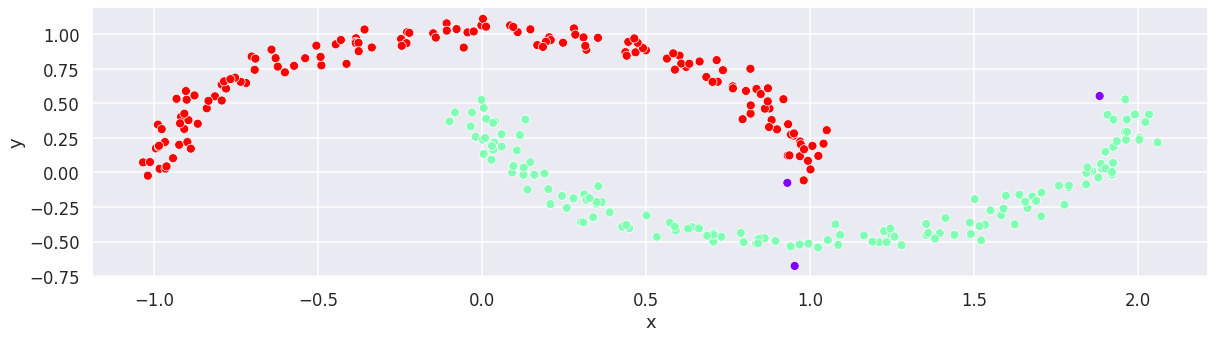

In [ ]:
labels = treinar_plotar_DBSCAN(df_baixa_densidade, 0.12, 5)

# TO-DO fazer uma iteraçao para testar os varios casos de epslon do knn